In [1]:
import numpy as np
import matplotlib.pyplot as plt
import drawing_functions as draw

# Introduction to Linear Algebra
## Purpose
This crash-course in linear algebra is based on the lecture series in linear algebra by [3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&si=Ojw8j-4N-uYjDxyz). The youtube material is excellent for building an intuition and getting more comfortable working with vectors, matrices, and transformations. However, learning linear algebra (or anything in general) require practice. Thus, we have complemented the material with problem sets.

Problem sets marked with $^\ast$ are more advanced and might require some additional reading beyond the videos.

*Try to solve the problem sets with as few additional packages as possible. Also try to avoid np.linalg in Ch. 1 and 2.*

### Learning goals:
- Intoduce basic concepts such as vectors and matrices operations and transformations.
- Understand basic properties and concepts related to matrices. Matrix transpose, inverse, rank, eigen values, eigen vectors, ...
- Learn a few matrix decompositions.
- Learn to solve linear least-squares problems.
- Get a basic understanding of convex optimization.
- Introduction to vector spaces.

## Introduction
Becoming comfortable with linear algebra as an engineering researcher might be the single most essential skill to learn (except maybe calculus and programming). Many of the research advancements in the past decades in fields such as control theory, signal processing, machine learning (ML), and optimization stem back to good foundations in linear algebra. Linear algebra provides the tools for numerically (by computations) and theoretically (by calculation) solving engineering problems. Fundamental concepts, such as regression (fitting models to data), classification (labeling data into categories), and clustering (finding patterns in data) are built on a foundation of linear algebra. Moreover, linear algebra is a cornerstone for many other disciplines beyond engineering, including physics, economics, computer graphics, and cryptography. Thus, mastering linear algebra empowers researchers with versatile problem-solving skills across numerous domains.

The relatively recent introduction of computer-aided tools like MATLAB and python packages such as *NymPy, SciLearn, TensorFlow, PyTorch*, etc., has accelerated the pace of research and development enormously. The ease of use of these packages allows users to perform complex machine learning and control theoretic tasks with more or less single lines of code. Thus, the development and prototyping of new algorithms have been significantly speeded up. Although this advance is fantastic, one needs to be cautious. The ease-of-use of these packages makes it easy to forget the fundamentals and can give a false impression of learning and understanding. Running a piece of code is is not the same discovering a mathematical proof! A solid foundation in linear can help us prove and analyze systems and make conclusions that extends far beyond of what a cpiece of computer program can do.

## Notation
**Set notation**
- A **set** is an unordered collection of 'things' denoted by curly brackets $\{$,$\}$. For example, if we want to define a set called $S$ containing the four numbers $1,2,3,4$ (in any particular order), we write $S=\{1,2,3,4\}$. Sets are not limited to containing numbers but can be defined to include any 'things' we can imagine: vectors, functions, matrices, problem solutions, apples, bananas... Mathematical sets are not that different than sets in python. However, in mathematics we tend to make sure that sets only contain 'things' of the same 'type'.
- Sets can also be infinite. For example, the set of real numbers is denoted $\mathbb{R}$, the set of natural numbers $\mathbb{N} = \{1,2,3,...\}$ sometimes defined to include 0), the set of integers $\mathbb{Z} = \{...,-2,-1,0,1,2,...\}$.
- If a 'thing' $x$ belongs to a set $S$, we write $x \in S$, reads as "$x$ is in the set S". For example, if a number $a$ is a real number, we write $a \in \mathbb{R}$. 
- Sets notation can also define sets as selections of larger sets, called set-builder notation. For example,
    - The set of rational numbers (numbers that can be written as fractions of integers) can be defined as $\mathbb{Q} = \{ \frac{p}{q} : p,q\in\mathbb{Z}, q\neq 0 \}$, reads as "$\mathbb{Q}$ is the set of numbers $\frac{p}{q}$ **such that** $p$ and $q$ are integers and $q$ is not zero".
    - The set of $n$-dimmensional vectors $v$ having length 1 can be defined as $\{ v\in\mathbb{R}^n : \mathrm{length}(v) = 1 \}$, where $\mathrm{length}$ is some function defining a length.


## Additional reading and watching
- MIT 18.06 Linear Algebra, Prof. Gilbert Strang [lecture material](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/pages/syllabus/)
- [Filtering and System Identification](https://www.cambridge.org/core/books/filtering-and-system-identification/D8589CB019CB233291427967DEE3EBE1), Section 2 Linear Algebra, Verhaegen and Verdult


---
# Ch. 1. Vectors

[![essence of linear algebra](https://img.youtube.com/vi/fNk_zzaMoSs/0.jpg)](http://www.youtube.com/watch?v=fNk_zzaMoSs)

[![essence of linear algebra](https://img.youtube.com/vi/k7RM-ot2NWY/0.jpg)](http://www.youtube.com/watch?v=k7RM-ot2NWY)

### New concepts:
- vectors
- vector addition and multiplication
- basis vectors
- span of vectors
- linear dependence
- linear combinations

### Self reflection after watching:
- Why do you think we make a difference between a point $(x,y)$ and a vector $\begin{bmatrix} x\\y \end{bmatrix}$ in a coordinate system?
- Can you think of other ways to represent a vector than the 'ordered list' $\begin{bmatrix} x\\y \end{bmatrix}$?
- Can you think of good ways to define the length of a vector?

### Problem set

**P1.1.** What is the (Eucledian) length of the following vectors $v_1 = \begin{bmatrix} 1\\0 \end{bmatrix}$, $v_2 = \begin{bmatrix} 1\\1 \end{bmatrix}$, and $v_3 = \begin{bmatrix} 1\\2\\3 \end{bmatrix}$?



In [2]:
import math

def vec_length(vec):
    
    sum_of_squares = 0

    for i in vec:
        sum_of_squares += i*i
    
    return math.sqrt(sum)

In [3]:
# Answer: 
import math

v1 = math.sqrt(1**2 + 0**2)

v2 = math.sqrt(1**2 + 1**2)

v3 = math.sqrt(1**2 + 2**2 + 3**2)

v1, v2, v3

(1.0, 1.4142135623730951, 3.7416573867739413)

**P1.2.** A ship (see figure) is affected by two forces (in some units):
- Forward thrust: $v_1 = \begin{bmatrix} 0\\1 \end{bmatrix}$
- Side wind: $v_2 = \begin{bmatrix} 1\\0.5 \end{bmatrix}$

What is the net force (vector) affectig the ship? Draw the net force (vector) in the figure below. What is the magnitude of the net force?

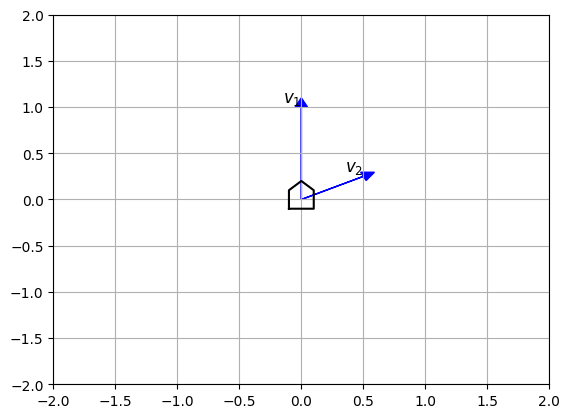

In [4]:
from drawing_functions import drawVec2, drawShip
import numpy as np
# Define the vector v directly
v_1 = np.array([0, 1])
v_2 = np.array([0.5, 0.25])

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vector as an arrow
draw.drawVec2(v_1,'$v_1$', ax)
draw.drawVec2(v_2,'$v_2$', ax)
draw.drawShip(ax, 0)

# Set the limits of the plot
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
# Set grid
ax.grid(True)

# Show the plot
plt.show()


In [5]:
def sum_of_Vectors(vecs):
    
    summed_vector = vecs[0]
    for i in vecs[1:]:
        summed_vector += i
    
    return summed_vector


In [7]:
import numpy as np
# Define the vector v directly
v_1 = np.array([0. , 1.])
v_2 = np.array([0.5, 0.25])
v_total = v_1 + v_2
# v_total # total exerted force
sum_of_Vectors([v_1, v_2])

array([0.5 , 1.25])

**P1.3** What does the set (collection) of **all** vectors of length (Euclidean) one look like? Make a python code that draws 100 different vectors of length one. How many different ways drawing vectors of length one can you think of?

In [8]:
# 
import random
for i in range(100):
    randnum = random.randint(0,1000) 
    v = [math.cos(randnum), math.sin(randnum)]
    print("vector v = ", v, " linear distance = ", math.sqrt(v[0]**2 + v[1]**2))


vector v =  [-0.9410467050017307, 0.33827666045026744]  linear distance =  0.9999999999999999
vector v =  [0.853220107722584, -0.5215510020869119]  linear distance =  0.9999999999999999
vector v =  [0.030884641938116356, 0.9995229556605263]  linear distance =  1.0
vector v =  [-0.8622730765672137, -0.5064436211734845]  linear distance =  1.0
vector v =  [-0.40805454148374776, -0.9129575516827102]  linear distance =  1.0
vector v =  [0.9496965803148245, -0.31317152702365525]  linear distance =  1.0
vector v =  [0.24104681672640127, -0.9705134889047492]  linear distance =  1.0
vector v =  [0.17165794832475895, 0.9851566112943334]  linear distance =  0.9999999999999999
vector v =  [0.8880104935408426, -0.4598231870636247]  linear distance =  1.0
vector v =  [-0.6401443394691997, -0.7682546613236668]  linear distance =  1.0
vector v =  [-0.022156893225121342, 0.9997545059076306]  linear distance =  1.0
vector v =  [0.998593270966005, -0.053023383345603574]  linear distance =  0.99999999999

**P1.4** Find the span of the following sets of vectors:
- $S = \{ \begin{bmatrix} 1\\0 \end{bmatrix}, \begin{bmatrix} 0\\1 \end{bmatrix} \}$
- $S = \{ \begin{bmatrix} 1\\3 \end{bmatrix}, \begin{bmatrix} 2\\6 \end{bmatrix} \}$
- $S = \{ \begin{bmatrix} 1\\3\\3 \end{bmatrix}, \begin{bmatrix} 0\\0\\1 \end{bmatrix}, \begin{bmatrix} 1\\3\\1 \end{bmatrix}  \}$

Visualize the span using python code.

In [9]:
# TODO: 

In [10]:
import numpy as np
# span = a*v1 + b*v2 for the sake of simplicity we define them as 1
a = 1 
b = 1

s1 = [np.array([1,0]), np.array([0,1])]
s1scal = (s1[0] / s1[1])


s2 = [np.array([1,3]), np.array([2,6])]
s2scal = (s2[0] / s2[1])


s3 = [np.array([1,3,3]), np.array([0,0,1]), np.array([1,3,1])]
s3scal1 = (s3[0] / s3[1])
s3scal2 = (s3[1] / s3[2])
s3scal3 = (s3[2] / s3[1])


print(s1scal, s2scal ,s3scal1, s3scal2, s3scal3)

[inf  0.] [0.5 0.5] [inf inf  3.] [0. 0. 1.] [inf inf  1.]


C:\Users\dimbou2\AppData\Local\Temp\ipykernel_19060\983962902.py:7: RuntimeWarning: divide by zero encountered in divide
  s1scal = (s1[0] / s1[1])
C:\Users\dimbou2\AppData\Local\Temp\ipykernel_19060\983962902.py:15: RuntimeWarning: divide by zero encountered in divide
  s3scal1 = (s3[0] / s3[1])
C:\Users\dimbou2\AppData\Local\Temp\ipykernel_19060\983962902.py:17: RuntimeWarning: divide by zero encountered in divide
  s3scal3 = (s3[2] / s3[1])


From the above we can see that:

S1 will span practically infinitely being able to reach any point 

S2 will behave like a line crossing 0,0


S3 will be a 3D plane able to anuver in 3D space

**P1.5** Are the following vectors linearely dependent? What is the span of the vectors?
$$ v_1 = \begin{bmatrix}1\\2\\3\end{bmatrix}, v_2 = \begin{bmatrix}4\\5\\6\end{bmatrix}, v_3 = \begin{bmatrix}7\\8\\9\end{bmatrix}$$

In [11]:
def check_linear_dependency(v1,v2,v3):

    
    dot_a = v1[0] * (v2[1]*v3[2] - v3[1]*v2[2]) 

    dot_b = v2[0] * (v1[1]*v3[2] - v3[1]*v1[2])
    
    dot_c = v3[0] * (v1[1]*v2[2] - v2[1]*v1[2])

    M = dot_a - dot_b + dot_c
    print(dot_a, -dot_b, dot_c)
    print(M)

    if(M != 0):
        print("linearly independant")
        return True
    else:
        print("linearly dependand")
        return False

In [12]:
v1 = [1,2,3]
v2 = [4,5,6]
v3 = [7,8,9]


check_linear_dependency(v1, v2, v3)
v1 = [2,12,2]
check_linear_dependency(v1,v2,v3)


-3 24 -21
0
linearly dependand
-6 -368 434
60
linearly independant


True

**P1.6**$^\ast$ A [*convex combination*](https://en.wikipedia.org/wiki/Convex_combination) $p$ of a set of vectors $\{v_i\}_{i=0,1,...,n-1}$ is defined as a *linear combination* where all scalars are non-negative and sums to one. That is,
$$
\begin{align}
&p = a_0v_0 + a_1v_1 + ... + a_{n-1}v_{n-1}, \\
&\sum_{i=0}^{n-1} a_i = 1\\
&a_i \geq 0,~ \quad i=0,1,...,n-1
\end{align}
$$

Write a piece of python code that visualizes convex combinations of the vectors
$$
v_1 = \begin{bmatrix} 0\\0\\1\end{bmatrix},
v_2 = \begin{bmatrix} 1\\0\\0\end{bmatrix},
v_3 = \begin{bmatrix} \frac{1}{2}\\ \sqrt{\frac{3}{2}}\\0\end{bmatrix},
v_4 = \begin{bmatrix} \frac{1}{2}\\\frac{\sqrt{3}}{6}\\ \frac{\sqrt{6}}{3}\end{bmatrix},
$$
that is $p = a_0v_0 + a_1v_1 + a_2v_2 + a_3v_3$, for various $a_0, a_1,a_2,a_3$.

What geometric shape does the set of all convex combinations in this case form? Why do you think is it called a **convex** combination?

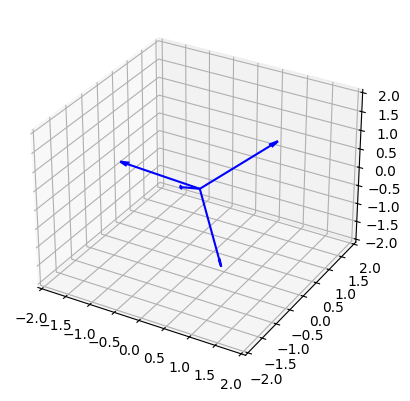

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from drawing_functions import drawVec3

# Define vertices of the tetrahedron as vectors
v_1 = np.array([1, 1, 1])
v_2 = np.array([-1, -1, 1])
v_3 = np.array([1, -1, -1])
v_4 = np.array([-1,1,-1])

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot vertices
draw.drawVec3(v_1,'$v_1$',ax)
draw.drawVec3(v_2,'$v_2$',ax)
draw.drawVec3(v_3,'$v_3$',ax)
draw.drawVec3(v_4,'$v_4$',ax)

# Set the limits of the plot
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
# Set grid
ax.grid(True)

plt.show()


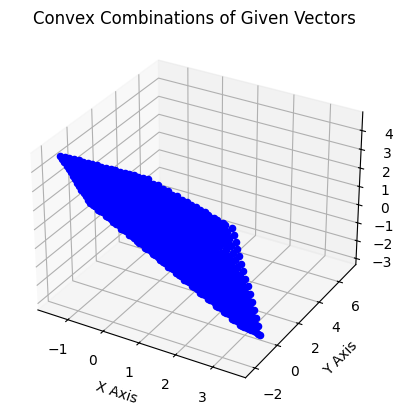

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the vectors
v_1 = np.array([0, 0, 1])
v_2 = np.array([1, 0, 0])
v_3 = np.array([0.5, np.sqrt(3/2), 0])
v_4 = np.array([0.5, np.sqrt(3)/6, np.sqrt(6)/3])

# Prepare for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate convex combinations
# Using a simple sampling strategy for illustration purposes
for a_0 in np.linspace(-2, 2, 20):
    for a_1 in np.linspace(-2, 2 - a_0, 15):
        for a_2 in np.linspace(-2, 2 - a_0 - a_1, 10):
            a_3 = 1 - a_0 - a_1 - a_2
            p = a_0*v_1 + a_1*v_2 + a_2*v_3 + a_3*v_4
            ax.scatter(p[0], p[1], p[2], color='blue')

# Set labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Convex Combinations of Given Vectors')
plt.show()


The covex part lies in the fact that all of those points that are generated lie in the are that was previously taken by the vectors 

**P1.7**$^\ast$ Watch this video

[![essence of linear algebra](https://img.youtube.com/vi/9R6zQfd6vlQ/0.jpg)](http://www.youtube.com/watch?v=9R6zQfd6vlQ)

and prove (or convice your self) that the method presented here works.

Let's assume that we perform dimentionality reduction on a set of vectors and we get the following:
NOTE: we can not longer reduce any variables, and the matrix remains as such

$$
\begin{bmatrix}
1 & 1 & 3 \\
0 & 1 & 2 \\
0 & 0 & 1 \\
\end{bmatrix}
$$ 

Now by doing matrix multiplication we can get the following:

$$
\begin{bmatrix}
1 & 1 & 3 \\
0 & 1 & 2 \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix} 
x \\ 
y \\
z \\
\end{bmatrix}
=
\begin{bmatrix}
x + y + 3z \\
y + 2z \\
z \\
\end{bmatrix}
$$ 

As a result we have a 3x1 matrix with no zero rows meaning that all of the rows contribute to the dimentionality as a result this spans 3 dimentions

Now let's inspect the following case where 

$$
\begin{bmatrix}
1 & 1 & 3 \\
0 & 1 & 2 \\
0 & 0 & 0 \\
\end{bmatrix}
$$ 

and after doing the multiplication

$$
\begin{bmatrix}
1 & 1 & 3 \\
0 & 1 & 2 \\
0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
x \\ 
y \\
z \\
\end{bmatrix}
=
\begin{bmatrix}
x + y + 3z \\
y + 2z \\
0 \\
\end{bmatrix}
$$ 

at this point we can see that we have one element that does not contribute to the dimentionality making it a 2D span matrix which results in a 2d plane in 3d space




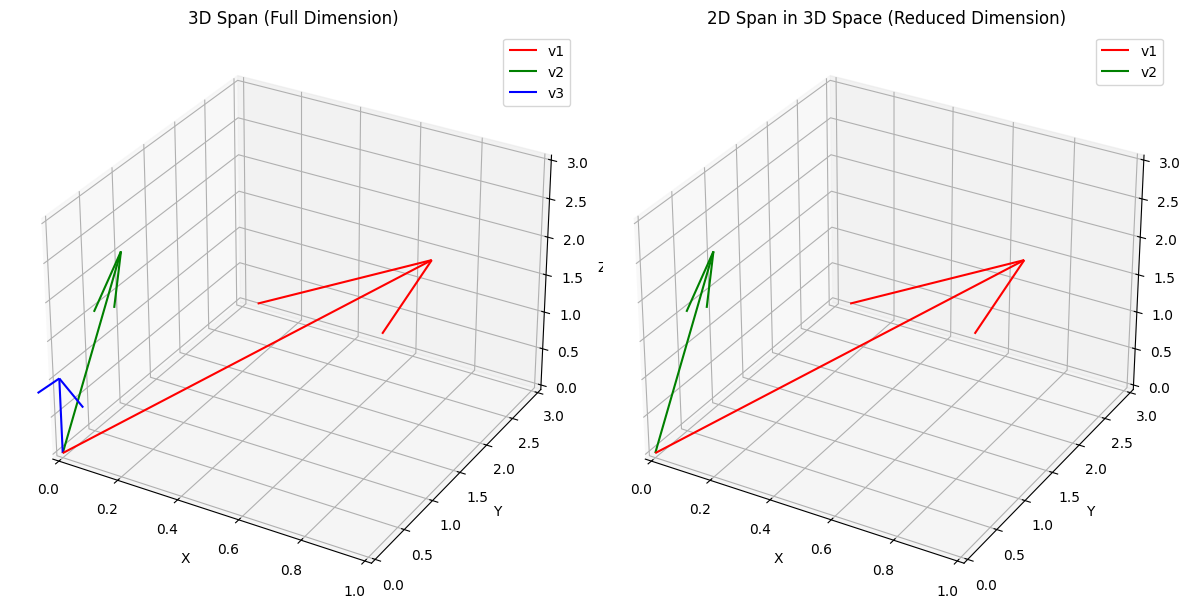

In [15]:
#Visual demo

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Define the vectors for the first matrix
vectors_1 = np.array([
    [1, 1, 3],
    [0, 1, 2],
    [0, 0, 1]
])

# Define the vectors for the second matrix
vectors_2 = np.array([
    [1, 1, 3],
    [0, 1, 2],
    [0, 0, 0]  # This row effectively does not contribute to the span
])

# Create 3D plots
fig = plt.figure(figsize=(12, 6))

# Plot for the first matrix
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(0, 0, 0, vectors_1[0,0], vectors_1[0,1], vectors_1[0,2], color='r', label='v1')
ax1.quiver(0, 0, 0, vectors_1[1,0], vectors_1[1,1], vectors_1[1,2], color='g', label='v2')
ax1.quiver(0, 0, 0, vectors_1[2,0], vectors_1[2,1], vectors_1[2,2], color='b', label='v3')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 3])
ax1.set_zlim([0, 3])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Span (Full Dimension)')
ax1.legend()

# Plot for the second matrix
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(0, 0, 0, vectors_2[0,0], vectors_2[0,1], vectors_2[0,2], color='r', label='v1')
ax2.quiver(0, 0, 0, vectors_2[1,0], vectors_2[1,1], vectors_2[1,2], color='g', label='v2')
# No need to plot the third vector since it's 0,0,0
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 3])
ax2.set_zlim([0, 3])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('2D Span in 3D Space (Reduced Dimension)')
ax2.legend()

plt.tight_layout()
plt.show()

**P1.X.** Create an exercise based on what you have learnt so far. Provide a model solution.

---
# Ch 2. Matrices and transformation

[![essence of linear algebra](https://img.youtube.com/vi/kYB8IZa5AuE/0.jpg)](http://www.youtube.com/watch?v=kYB8IZa5AuE)

[![essence of linear algebra](https://img.youtube.com/vi/XkY2DOUCWMU/0.jpg)](http://www.youtube.com/watch?v=XkY2DOUCWMU)

## Summary

**Matrix addition:**

![matrix addition](https://content.codecademy.com/courses/deeplearning-with-tensorflow/deep-learning-math/Matrix_B.gif)

**Matrix multiplication:**

![matrix multiplication](https://codecademy-content.s3.us-east-1.amazonaws.com/courses/deeplearning-with-tensorflow/deep-learning-math/matrix_mult.png)

**Matrix transpose**

![matrix transpose](https://content.codecademy.com/courses/deeplearning-with-tensorflow/deep-learning-math/Matrix_C.gif)


**P2.1** Rewrite the following system of equation in matrix-vector notation
$$
\begin{align}
3x_1 - 2x_2 - x_3 &= 5\\
2x_1 - x_2 + 3x_3 &= 12\\
x_1 + 4x_2 - 2x_3 &= 0\\
\end{align}.
$$
Define the vectors $x$ and $y$ and the matrix $A$.


$$
\begin{bmatrix}
3 & -2 & -1 \\
2 & -1 & 3 \\
1 & 4 & -2 \\
\end{bmatrix}

\begin{bmatrix}
x1 \\
x2 \\
x3 \\
\end{bmatrix}

=

\begin{bmatrix}
5  \\
12 \\
0  \\
\end{bmatrix}
$$ 


**P2.2** Write your own scripts (without numpy) for
- Computing the transpose of a matrix
- Matrix-vector multiplication
- Multiplying two matrices

In [16]:
def transpose_matrix(matrix):

    original_rows = len(matrix)
    original_columns = len(matrix[0])
    transposed = []
    for i in range(original_columns):
        transposed.append(list(range(original_rows)))
    for i in range(original_rows):
        for j in range(original_columns):
            transposed[j][i] = matrix[i][j]


    return transposed

In [17]:
def matrix_vector_multiplication(matrix, vector):

    # assume that they are ok meaning the inner dimentions are the same ex: 2x3 and 3x1

    results = []
    
    for i in matrix:
        element = 0
        for it in range(len(vector)): element += i[it]*vector[it]
        results.append(element)

    return results

In [18]:
def matrix_multiplication(A, B):
    
    rows_A = len(A)
    cols_A = len(A[0])
    
    rows_B = len(B)
    cols_B = len(B[0])
    
    if cols_A != rows_B: return "Matrices are not compatible for multiplication."
    
                                    
    result = []                     
    for i in range(rows_A):     
        row = []                
        for j in range(cols_B): 
            row.append(0)           
        result.append(row)  
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
                
    return result

In [19]:
matrix1 = [
    [1, 2, 3],  
    [4, 5, 6],  
    [7, 8, 9]   
]
vec1 = [1,
        2,
        3]

test_1 = transpose_matrix(matrix=matrix1)

matrix2 = [
    [1, 2, 3],  
    [4, 5, 6]  
]

matrix3 = [
    [1, 2],
    [1, 2],
    [1, 2]
]
           

vec2 = [1,
        2]

test_2 = transpose_matrix(matrix=matrix2)

for i in test_1: print(i)
print()
for i in test_2:print(i)


print(matrix_vector_multiplication(matrix1,vec1))

matrix_multiplication(matrix1, matrix3)
    

[1, 4, 7]
[2, 5, 8]
[3, 6, 9]

[1, 4]
[2, 5]
[3, 6]
[14, 32, 50]


[[6, 12], [15, 30], [24, 48]]

In [20]:
mat = [[1, 2, 3, 4],[5, 6, 7, 8]]
vec = [1, 2, 3 ,4]


def isvector(x):
    for element in x:
        if isinstance(element, list):
            return False
    return True

def get_col(mat,i):
     n_rows, n_cols = dim(mat)
     if i > n_cols-1:
         raise IndexError("index i is greater than number of columns")
     else:
         col=[]
         for row in mat:
             col.append(row[i])
         return transpose(col)

def dim(x):
    '''Returns the dimentions of a matrix'''
    if isvector(x):
        n_cols = 1
        n_rows = len(x)
        return n_cols, n_rows
    else:
        n_rows = len(x)
        n_cols = len(x[0]) if mat else 0  # Assuming all rows have the same length
        return n_rows, n_cols
    
def transpose(mat):
    '''Computes the transpose of a matrix'''
    n_rows, n_cols = dim(mat)
    if n_rows == 1 or n_cols == 1:
        #is vector:
        # If the input is already transposed (i.e., a column vector),
        # return the flattened version (original form) of the vector
        if isinstance(mat[0], list):
            return [x[0] for x in mat]
        # Otherwise, if it's a row vector, transpose it into a column vector
        return [[x] for x in mat]
    else:
        # is matrix:
        matt = []
        for j in range(n_cols):
            col = []
            for row in mat:
                col.append(row[j])
            matt.append(col)
        return matt

def mat_add(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")
    if isinstance(list1[0], list):
        return [add_elementwise(sublist1, sublist2) for sublist1, sublist2 in zip(list1, list2)]
    else:
        return [x + y for x, y in zip(list1, list2)]

def scalar_mult(arr, scalar):
    return [[element * scalar for element in row] for row in arr]

#def mat_vec_mult(mat,vec):
#    '''returns y = A*x'''
#    n_rows, n_cols = dim(mat)
#    
#    y=[0 for _ in range(n_rows)]
#    for j in range(n_cols):
#        print(vec[j])
#        y = mat_add(y, scalar_mult( get_col(mat,j), vec[j] ) )
#    return y

#print(len(vec[0]))


    

**P2.3** Write a function that checks if two matrices $A$ and $B$ can be multiplied.

In [21]:
def check_multiplication(A, B):
    # rows_a = len(A)
    cols_a = len(A[0])    
    rows_b = len(B)
    # cols_b = len(B[0])

    # inner dims need to match
    if(cols_a != rows_b): return False
    
    return True


In [22]:
matrix1 = [
    [1, 2, 3],  
    [4, 5, 6],  
    [7, 8, 9]   
]

vec1 = [[1],
        [2],
        [3]]


matrix2 = [
    [1, 2, 3],  
    [4, 5, 6]  
]

# true 3x3 * 3x1
print(check_multiplication(matrix1, vec1))

# false 3x3 * 2x3
print(check_multiplication(matrix1, matrix2)) 

True
False


**P2.3** Visualize the function $f(x) = x^T Q x + Ax$, where $x\in\mathbb{R}^2$ and
$$
Q = \begin{bmatrix} 1 &0.5\\0.5 &1 \end{bmatrix},~A=\begin{bmatrix}-5\\1\end{bmatrix}.
$$

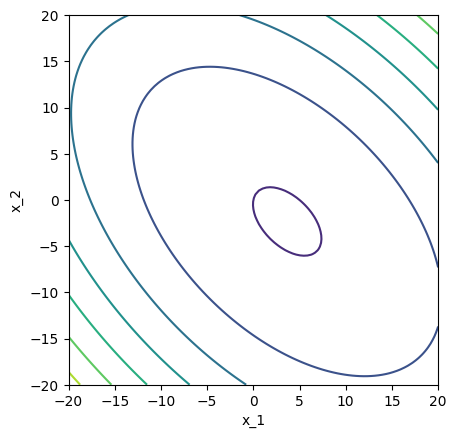

In [23]:
Q = np.array([[1, .5],[.5, 1]])
A = np.array([-5, 1])
x = [[1],
     [2]] # 2 elem

"""
x  = [
    [1, 0, 0],  
    [0, 0, 0],  
    [0, 0, 0]   
]

x  = [
    [1, 0],  
    [0, 0],  
]

"""

# Define the function
def f(x_1, x_2, Q, A):
    x_prime = np.array([[x_1], [x_2]])  # Reshape to column vectors
    return x_prime.T@Q@x_prime + A@x_prime
    #return np.dot(np.dot(x_prime.T, Q), x_prime) + np.dot(A, x_prime).flatten()

# Generate points for plotting
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f(xi, yi, Q, A) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

# Plot the function
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

# Set labels
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_aspect('equal', 'box')
plt.show()



**P2.4** Explore what happens when you change $Q$ and $A$.


$$
Q = \begin{bmatrix} 1 &0.5\\0.5 &1 \end{bmatrix},~A=\begin{bmatrix}-5\\1\end{bmatrix}.
$$

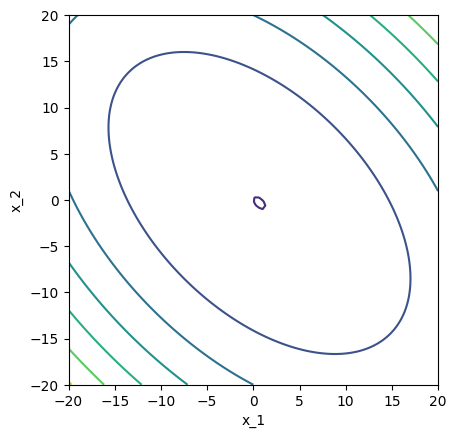

In [24]:
Q = np.array([[1., .5],[.5, 1]])
A = np.array([-1, 0])
x = [[1],
     [2]] # 2 elem

"""
x  = [
    [1, 0, 0],  
    [0, 0, 0],  
    [0, 0, 0]   
]

x  = [
    [1, 0],  
    [0, 0],  
]

"""

# Define the function
def f(x_1, x_2, Q, A):
    x_prime = np.array([[x_1], [x_2]])  # Reshape to column vectors
    return x_prime.T@Q@x_prime + A@x_prime
    #return np.dot(np.dot(x_prime.T, Q), x_prime) + np.dot(A, x_prime).flatten()

# Generate points for plotting
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f(xi, yi, Q, A) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

# Plot the function
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

# Set labels
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_aspect('equal', 'box')
plt.show()


**P2.5** What is the minima of f(x) in P2.2?

In [25]:
def f(x_1, x_2, Q, A):
    x_prime = np.array([[x_1], [x_2]])  # Reshape to column vectors
    return x_prime.T@Q@x_prime + A@x_prime


"""
The goal would be to find the places where the derivative is 0
and from those locate the lowest one
"""

'\nThe goal would be to find the places where the derivative is 0\nand from those locate the lowest one\n'

**P2.X** $^\ast$ Write a python script that takes in a matrix and rewrites it in row-echolon form. See, e.g. [geeksforgeeks](https://www.geeksforgeeks.org/converting-matrix-into-row-echelon-form-in-python/) for inspiration.

In [8]:
def is_row_echelon_form(matrix):

	rows = len(matrix)
	cols = len(matrix[0])
	prev_leading_col = -1

	for row in range(rows):
		leading_col_found = False
		for col in range(cols):
			if matrix[row][col] != 0:
				if col <= prev_leading_col:
					return False
				prev_leading_col = col
				leading_col_found = True
				break
		if not leading_col_found:
			found = False
			for col in range(cols):
				if (matrix[row][col] != 0):
					return False
	return True

def find_nonzero_row(matrix, pivot_row, col):
	nrows = len(matrix)
	for row in range(pivot_row, nrows):
		if matrix[row][col] != 0:
			return row
	return None

# Swapping rows so that we can have our non zero row on the top of the matrix
def swap_rows(matrix, row1, row2):
	r1_temp = matrix[row1]
	r2_temp = matrix[row2]
	# matrix[row1, row2] = matrix[row2, row1]
	matrix[row1] = r2_temp
	matrix[row2] = r1_temp

def make_pivot_one(matrix, pivot_row, col):
	pivot_element = matrix[pivot_row][col]
	for i in range(len(matrix[pivot_row])):
		matrix[pivot_row][i] //= pivot_element
	# print(pivot_element)

def eliminate_below(matrix, pivot_row, col):
	nrows = len(matrix)
	pivot_element = matrix[pivot_row][col]
	
	for row in range(pivot_row + 1, nrows):
	
	
	
		factor = matrix[row][col]
		for i in range(len(matrix[row])):
			matrix[row][i] -= factor * matrix[pivot_row][i]

# Implementing above functions
def row_echelon_form(matrix):
	nrows = len(matrix)
	ncols = len(matrix[0])
	pivot_row = 0
# this will run for number of column times. If matrix has 3 columns this loop will run for 3 times
	for col in range(ncols):
		nonzero_row = find_nonzero_row(matrix, pivot_row, col)
		print(nonzero_row)	
		if nonzero_row is not None:
			swap_rows(matrix, pivot_row, nonzero_row)
			
			make_pivot_one(matrix, pivot_row, col)
			eliminate_below(matrix, pivot_row, col)

		# 	print(matrix)
			pivot_row += 1
			
	return matrix

In [10]:
matrix = [
    [2,-2,4,-2],
    [2,1,10,7],
    [-4,4,-8,4],
    [4,-1,14,6]
]

result =  row_echelon_form(matrix)

print(result)

if is_row_echelon_form(result):
	print("In REF")
else:
	print("Not in REF--------------->")


0
1
None
3
[[1, -1, 2, -1], [0, 1, 2, 3], [0, 0, 0, 1], [0, 0, 0, 0]]
In REF


**P2.X+1**$^\ast$ Solve for $x$ in P2.1 using your method from P2.X.

$$
\begin{bmatrix}
3 & -2 & -1 \\
2 & -1 & 3 \\
1 & 4 & -2 \\
\end{bmatrix}

\begin{bmatrix}
x1 \\
x2 \\
x3 \\
\end{bmatrix}

=

\begin{bmatrix}
5  \\
12 \\
0  \\
\end{bmatrix}
$$ 


In [105]:
def row_echelon_form_solver(matrix, equals):

    rows = len(matrix) -1
    col = len(matrix[0]) -1
    xs = []

    # we iterate through every row 
    for i in range(rows,-1,-1):
        
        eq = equals[i]

        if(len(xs) == 0):
            xs.append(eq)
            continue

        factors = 0

        for j in range(len(xs)):
            factors += xs[j] * matrix[i][col-j]
        
        xs.append(eq-factors)
        
    return xs

In [107]:
matrix = [
    [3, - 2, - 1, 5 ],
    [2, - 1, + 3, 12],
    [1, + 4, - 2, 0 ] 
]

result =  row_echelon_form(matrix)

for i in result: 
    print(i)

matrix_equals = []



for i in range(len(result)):
    matrix_equals.append(result[i][-1])
    result[i].pop()

print()
    
x_vals = row_echelon_form_solver(result, matrix_equals)

for i in range(len(x_vals)):
    print(result[i],  " = ",   x_vals[i])

0
1
2
None
[1, -1, -1, 1]
[0, 1, 5, 10]
[0, 0, 1, 1]

[1, -1, -1]  =  1
[0, 1, 5]  =  5
[0, 0, 1]  =  7


# Ch 3. Linear least squares

TODO:

properties of matricies 

matrix decompositions

sparse-matrix multiplication

matrix rank, eigen values, eigenvectors, determinant

matrix decompositions:
singular value decomposition
LU factorization
QR factorization
 

Define Sprint 1 task and verify with Mika Karaila.
FMU model creation and dynamical inputs from automation systems
Python prototype of FMU simulation
OPC-UA client will execute FMU model.
Python client for OPC-UA client: Asyncio
uaexpert

